# Exploring the Link between DDPMs and Optimal Transport

**Denoising diffusion probabilistic models (DDPMs)** have recently gained significant attention for their ability to model complex distributions, particularly in tasks such as image synthesis. A key aspect of understanding DDPMs lies in analyzing their latent codes, which play a crucial role in generating realistic samples.

The paper titled *[Understanding DDPM Latent Codes through Optimal Transport](https://arxiv.org/abs/2202.07477)* (Khrulkov 2022) provides insights into this aspect by exploring the relationship between DDPM latent codes and optimal transport theory. By analyzing the optimal transport map between the data distribution and the standard normal distribution, the paper sheds light on the geometric properties of DDPM latent codes. Through extensive numerical experiments and theoretical analysis, the authors demonstrate that the **DDPM encoder map** closely approximates the **Monge map** associated with optimal transport, especially for common distributions.

In this document, we explain the main results and try to reimplement the findings of this paper.

## Background

### Denoising Diffusion Probabilistic Models

DDPMs are generative models that utilize a forward diffusion process to transform clean data into Gaussian distributions by gradually adding noise. The generative model then learns to reverse this process, producing realistic samples from noise. The forward process is described by the transition probabilities:

$$
q(x_{t}|x_{t-1}) = \mathcal{N}(x_t; \sqrt{1-\beta_t}x_{t-1}, \beta_t I)
$$

where $\beta\_1, \dots, \beta_t$ represent the variance schedule. The generative model learns parameterized Gaussian transitions, given by:

$$
p_{\theta}(x_{t-1}|x_t) = \mathcal{N}(x_t; a_{\theta}(x_t, t), \sigma_t)
$$

A key component of DDPMs is the incorporation of a score function, which guides the generative process by approximating the gradients of the log-density of the target distribution. This score function, denoted as $s_{\theta}(x_t, t)$, where $\theta$ represents the model parameters, plays a crucial role in both training and sampling from the model. Mathematically, the score function is defined as:

$$
s_{\theta}(x_t, t) = \frac{\epsilon_{\theta}(x_t, t)}{\sqrt{1 - \bar{\alpha}_t}}
$$

where $\epsilon_{\theta}(x_t, t)$ is the noise predictor network predicting the noise component from the sample $x_t$ and step $t$, and $\bar{\alpha}_t$ represents the product of decay factors up to step $t$.

In practice, DDPMs offer both *stochastic and deterministic sampling* techniques. Stochastic sampling involves generating noisy samples from the current state using the score function and random noise, capturing the inherent uncertainty in the generative process. Mathematically, stochastic sampling is expressed as:

$$
x_{t-1} = \frac{1}{\sqrt{\alpha_{t}}} \left( x_{t} - \frac{1 - \alpha_{t}}{\sqrt{1 - \bar{\alpha}_{t}}} \epsilon_{\theta}(x_{t}, t) \right) + \sigma_{t} \mathbf{z}
$$

where $x_{t-1}$ represents the noisy sample at time $t-1$, $\mathbf{z}$ is sampled from a standard normal distribution, and $\sigma_{t}$ represents the scale of the noise.

Conversely, deterministic sampling, as proposed in variants like DDIM (Denoising Diffusion Implicit Model), provides a deterministic approach to sample from the target distribution without the need for retraining. Mathematically, DDIM sampling is expressed as:

$$
x_{t-1} = \sqrt{\bar{\alpha}_{t-1}} \left( \frac{x_{t} - \sqrt{1 - \bar{\alpha}_{t}} \epsilon_{\theta}(x_{t}, t)}{\sqrt{\bar{\alpha}_{t}}} \right) + \sqrt{1-\bar{\alpha}_{t-1}} \cdot \epsilon_{\theta}(x_{t}, t)7
$$

By integrating these sampling techniques with the theoretical framework of Stochastic Differential Equations (SDEs), DDPMs offer a versatile and effective approach to generative modeling.


### Stochastic Differential Equations

The authors of [Meng et al. (2021)](https://arxiv.org/abs/2108.01073) proposed viewing diffusion models as discretizations of certain SDEs. In this work, we stick to the discrete vision of DDPMs. 

## Relationship with Optimal Transport

In the paper, the authors investigate how the DDPM encoder map relates to optimal transport (OT) theory, particularly focusing on the Monge map.

### Monge Map

The Monge formulation seeks to find a transport map $S: X \rightarrow Y$ that directly maps points from one distribution to another while minimizing the transportation cost. Mathematically, this involves finding $S$ such that $\int c(x, S(x)) \mu(x) \, dx$ is minimized over all transport maps $S$ such that $\nu = S_{\#} \mu$, where $S_{\#} \mu$ denotes the push-forward measure of $\mu$ under $S$.


### DDPM encoder map

The encoder map of DDPMs is a key component responsible for mapping data distributions to a standard normal distribution. The encoder map is obtained by considering the probability flow ODE. For a given distribution $\mu_0$ and a timestep $t$, the flow generated by this vector field is denoted as $E_{\mu_0}(t, \cdot)$. The final encoding map is obtained when $t \rightarrow \infty$, defined as:

$$
E_{\mu_0}(x) := \lim_{t \rightarrow \infty} E_{\mu_0}(t, x)
$$

### DDPM encoder and OT (Theorem 3.1 of the paper)

The paper explores the relationship between the DDPM encoder map and the Monge map associated with optimal transport. Specifically, it investigates whether the DDPM encoder map performs an optimal transformation that minimizes the transportation cost between the data distribution and the standard normal distribution.

**Theorem 3.1** in the paper provides a theoretical foundation for understanding the relationship between the DDPM encoder map and the Monge map :

Given a multivariate normal distribution $\mu_0$ with mean vector $a(0)$ and covariance matrix $\Sigma(0)$, Theorem 3.1 establishes that the DDPM encoder map $E_{\mu_0}$ coincides with the Monge optimal transport map between $\mu_0$ and the standard normal distribution $\mathcal{N}(0, I)$. In other words, the encoder map $E_{\mu_0}(x)$ is equivalent to $\Sigma(0)^{-1/2}(x - a(0))$.

Let $X$ represent the data space, $Z$ denote the latent space, and $\mathcal{N}(0, I)$ denote the standard normal distribution. The goal is to find the optimal mapping $E_{\mu_0}: X \rightarrow Z$ that minimizes the transportation cost between the data distribution $\mu_0$ and the standard normal distribution.

The transportation cost $C(E_{\mu_0})$ is defined as the integral of the cost function $c(x, E_{\mu_0}(x))$ with respect to the density of $\mu_0$:
$$
C(E_{\mu_0}) = \int_{X} c(x, E_{\mu_0}(x)) \mu_0(x) \, dx
$$

The Monge map $S$ minimizes this transportation cost:
$$
S = \arg \min_{E_{\mu_0}} C(E_{\mu_0})
$$

Theorem 3.1 asserts that **the DDPM encoder map $E_{\mu_0}$ achieves this minimum transportation cost, aligning with the Monge optimal transport map**.

## Numerical experiments on synthetic data

To illustrate the result of the Theorem 3.1, we can compare the Monge optimal transport map and the DDPM encoder map on 2d multivariate normal distributions. Given $\mu \sim \mathcal{N}(a,I_2)$ where $a\in \mathbb{R}^2$, we compute the Monge optimal transport map and the DDMP encoder map between $\mu$ and a reduced centered normal law $\mathcal{N}(0,I_2)$. 

First, lets draw some points according to $\mu \sim \mathcal{N}(a,I_2)$

In [1]:
import jax
import jax.random as jrd
import jax.numpy as jnp

key = jrd.PRNGKey(42)

mean = jnp.array([-10, -5.0]) 
covariance = jnp.array([[1.0, 0.], [0., 1.0]])
n_points = 10000

datapoints = jrd.multivariate_normal(key, mean, covariance, shape=(n_points,))

We can plot these points: 

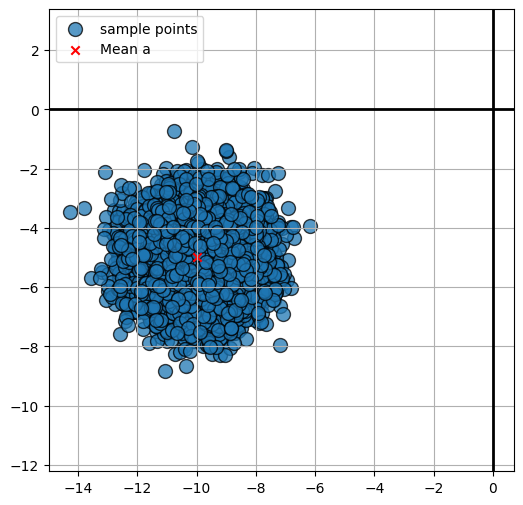

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(datapoints[:, 0], datapoints[:, 1], s=100, label="sample points", edgecolor="k", alpha=0.75)
plt.axhline(0, color='black', linewidth=2)
plt.axvline(0, color='black', linewidth=2)
plt.scatter(-10, -5, color='red', marker='x', label='Mean a')
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

### Optimal transport setting

For the Monge optimal transport map, we use the Sinkhorn algorithm. 

Given two discrete distributions represented by vectors $\mathbf{a}$ and $\mathbf{b}$, along with a cost matrix $C$ ,the Sinkhorn algorithm provides an iterative procedure to compute an approximate solution to the optimal transport problem. 

1. **Initialization**: Start with non-negative matrices $\mathbf{K}$ and $\mathbf{P}$ with appropriate dimensions. Set $\mathbf{K} = \exp(-C)$ to ensure non-negativity and $\mathbf{P} = \mathbf{K}$ initially.

2. **Iteration**:
   - **Step 1**: Scale the rows of $\mathbf{P}$ to match the marginals of $\mathbf{a}$.
   $$ \mathbf{P} \leftarrow \mathbf{P} \odot \left( \frac{\mathbf{a}}{\mathbf{P} \mathbf{1}} \right) $$ 
   - **Step 2**: Scale the columns of $\mathbf{P}$ to match the marginals of $\mathbf{b}$.
   $$ \mathbf{P} \leftarrow \mathbf{P} \odot \left( \frac{\mathbf{b}}{\mathbf{1}^T \mathbf{P}} \right) $$
   - Repeat Steps 1 and 2 for a fixed number of iterations or until convergence.


In [4]:
import ott
from ott.geometry import costs, pointcloud
from ott.problems.linear import linear_problem
from ott.solvers.linear import sinkhorn
from ott.solvers import linear

mean_target = jnp.array([0, 0])
covariance_target = jnp.eye(2)

target = jrd.multivariate_normal(key, mean_target, covariance_target, shape=(n_points,))

geom = pointcloud.PointCloud(datapoints, target)

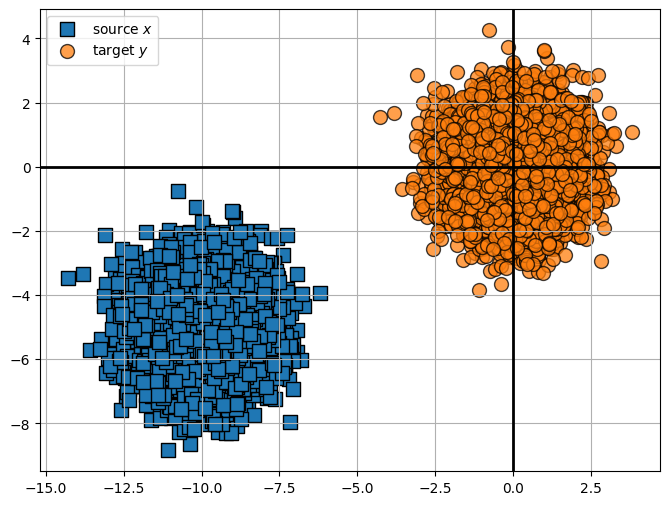

In [5]:
x_args = {"s": 100, "label": r"target $y$", "edgecolor": "k", "alpha": 0.75}
y_args = {"s": 100, "label": r"source $x$", "marker": "s", "edgecolor": "k"}
plt.figure(figsize=(8, 6))
plt.scatter(datapoints[:, 0], datapoints[:, 1], **y_args)
plt.scatter(target[:, 0], target[:, 1], **x_args)
plt.axhline(0, color='black', linewidth=2)
plt.axvline(0, color='black', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def plot_map(x, y, z, forward: bool = True):
    fig, ax = plt.subplots(figsize=(8, 8))
    marker_t = "o" if forward else "X"
    label = (
        r"$T_{x\rightarrow y}(x)$" if forward else r"$T_{y\rightarrow x}(y)$"
    )
    w = x if forward else y
    ax.quiver(
        *w.T,
        *(z - w).T,
        color="k",
        angles="xy",
        scale_units="xy",
        scale=1,
        width=0.007,
    )
    ax.scatter(*x.T, s=200, edgecolors="k", marker="o", label=r"$x$")
    ax.scatter(*y.T, s=200, edgecolors="k", marker="X", label=r"$y$")
    ax.scatter(*z.T, s=150, edgecolors="k", marker=marker_t, label=label)
    ax.axis("equal")
    ax.axhline(0, color='black', linewidth=2)
    ax.axvline(0, color='black', linewidth=2)
    ax.legend(fontsize=22)
    ax.grid(True)

We define a linear problem, create a Sinkhorn solver and solve the optimal transport problem

In [8]:
ot_prob = linear_problem.LinearProblem(geom)

solver = sinkhorn.Sinkhorn()

ot = solver(ot_prob)
dual_potentials = ot.to_dual_potentials()

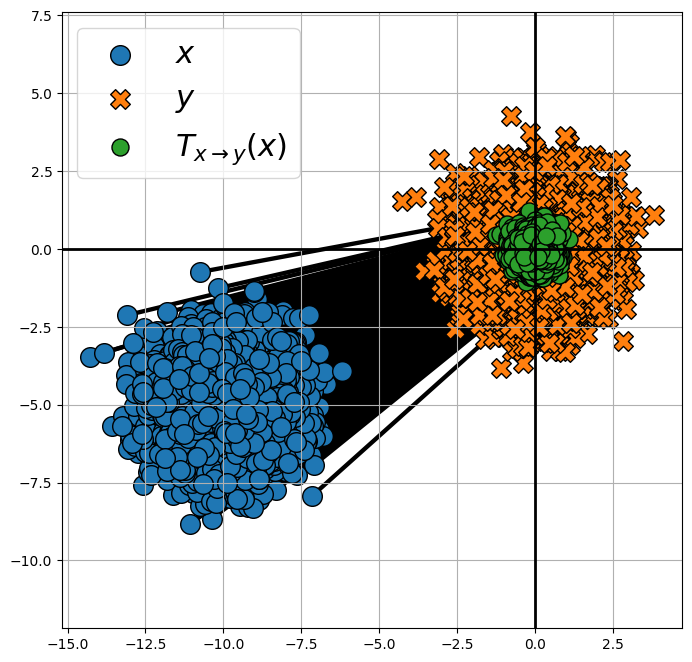

In [9]:
plot_map(datapoints, target, dual_potentials.transport(datapoints))

In [10]:
print(
    " Sinkhorn has converged: ",
    ot.converged,
    "\n",
    "Error upon last iteration: ",
    ot.errors[(ot.errors > -1)][-1],
    "\n",
    "Sinkhorn required ",
    jnp.sum(ot.errors > -1),
    " iterations to converge. \n",
    "Entropy regularized OT cost: ",
    ot.reg_ot_cost,
    "\n",
    "OT cost (without entropy): ",
    jnp.sum(ot.matrix * ot.geom.cost_matrix),
)

 Sinkhorn has converged:  True 
 Error upon last iteration:  1.3144017e-07 
 Sinkhorn required  1  iterations to converge. 
 Entropy regularized OT cost:  128.40796 
 OT cost (without entropy):  127.86115


So the cost of the Monge optimal transport $C(OT)$ is in our case the value of $\texttt{ot.reg\_ot\_cost}$

In [17]:
cost_ot = ot.reg_ot_cost
print("C(OT)=", cost_ot)

C(OT)= 128.40796


### Diffusion setting

Concerning the DDPM encoder map, we first transform our clean data (sample from $\mu \sim \mathcal{N}(a,I_2)$) into the gaussian distribution $\mathcal{N}(0,I_2)$ using the forward process: 
$$
q(x_{t}|x_{t-1}) = \mathcal{N}(x_t; \sqrt{1-\beta_t}x_{t-1}, \beta_t I)
$$
This step is done with the method $\texttt{diffuse}$ from the class $\texttt{DiffusionModel}$ (see the file DDPM.model.py)

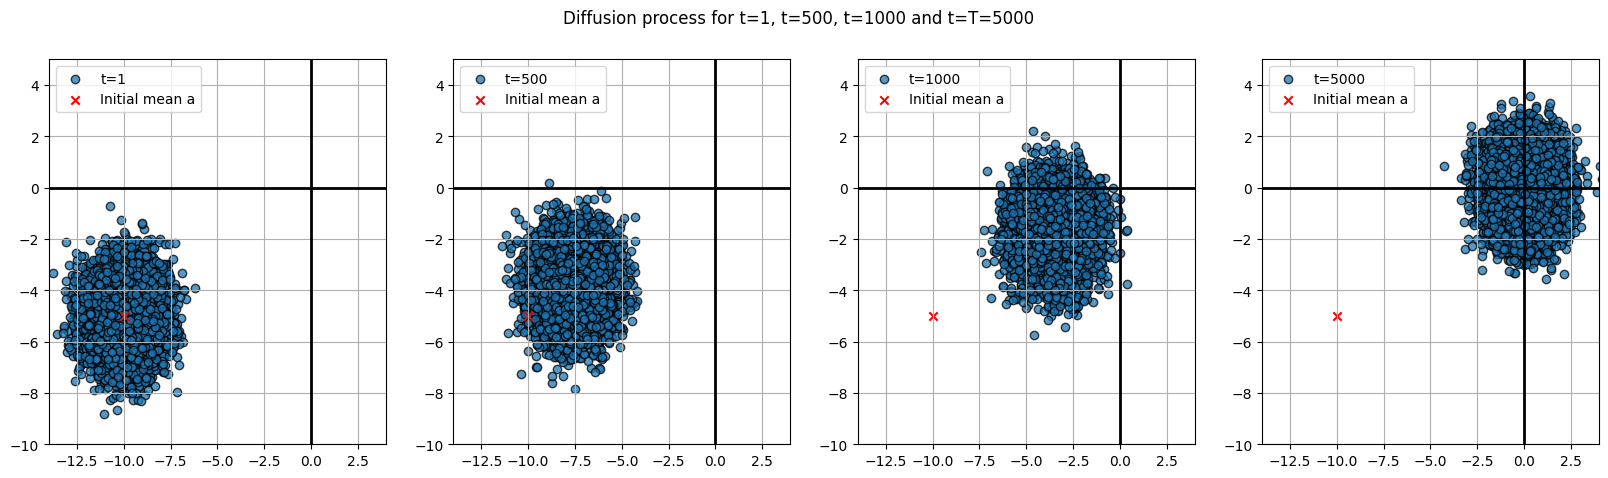

In [14]:
import torch
import numpy as np
from DDPM.model import DiffusionModel, NoiseModel

n_steps = 5000
beta_1 = 0.0001
beta_t = 0.02
device = "cuda" if torch.cuda.is_available() else "cpu"
 
model = NoiseModel(n_steps)
diffuser = DiffusionModel(model, n_steps, beta_1, beta_t, device)

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
fig.suptitle("Diffusion process for t=1, t=500, t=1000 and t=T=5000")
data_tensor = torch.Tensor(np.array(datapoints))
steps = [1, 500, 1000, 5000]
for step, ax in zip(steps, axs):
    t = step * torch.ones([1,], dtype=torch.int32, device=device)
    eps, diffused = diffuser.diffuse(data_tensor, t)
    ax.scatter(diffused[:, 0], diffused[:, 1], label='t='+str(step), edgecolor="k", alpha=0.75)
    ax.set_xlim(-14, 4)
    ax.set_ylim(-10,5)
    ax.axhline(0, color='black', linewidth=2)
    ax.axvline(0, color='black', linewidth=2)
    ax.scatter(-10, -5, color='red', marker='x', label='Initial mean a')
    ax.legend()
    ax.grid(True)

We can compute the cost $C(DDPM)$ of DDPM encoder map

In [15]:
geom = pointcloud.PointCloud(datapoints, diffused.cpu().numpy())
M = geom.cost_matrix
cost_ddpm = np.diag(M).sum() / datapoints.shape[0]
print("C(DDPM)=", cost_ddpm)

C(DDPM)= 128.839825


And we can compute the relative error between the Monge optimal transport map and the DDPM encoder map, defined by $$ \epsilon_{rel} = \frac{C(DDPM) - C(OT)}{C(OT)} $$ 

In [18]:
print("eps_rel =", (cost_ddpm - cost_ot) / cost_ot)

eps_rel = 0.0033632612


This value is consistent with Theorme 3.1 and the findings of the paper *[Understanding DDPM Latent Codes through Optimal Transport](https://arxiv.org/abs/2202.07477)*

We can train a noise predictor network $\epsilon_{\theta}$. All the training process is wrapped into the trainer $\texttt{DiffusionTrainer}$. (see the file DDPM.trainer.py)

100%|██████████| 100/100 [00:11<00:00,  8.61it/s]


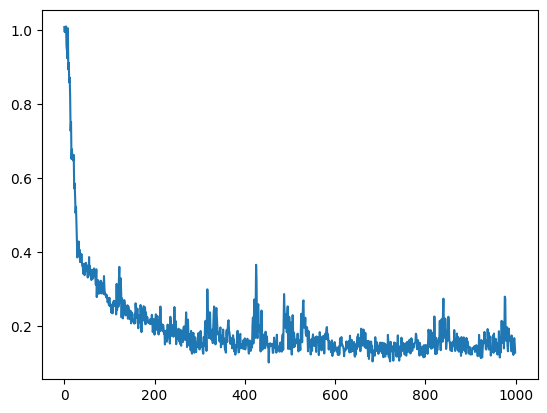

In [9]:
from DDPM.trainer import DiffusionTrainer

# Hyper parameters
batch_size = 1024
n_epochs = 100
lr = 0.01

trainer = DiffusionTrainer(data_tensor, batch_size, beta_1, beta_t, n_steps, lr, device)
all_losses = trainer.train(n_epochs)
plt.figure()
plt.plot(all_losses)
plt.show()

Given a noise $z \sim \mathcal{N}(0,I_2)$ and using the trained noise model, we run the backward process and thus obtain a sample distributed according to the initial distribution $\mathcal{N}(a,I_2)$

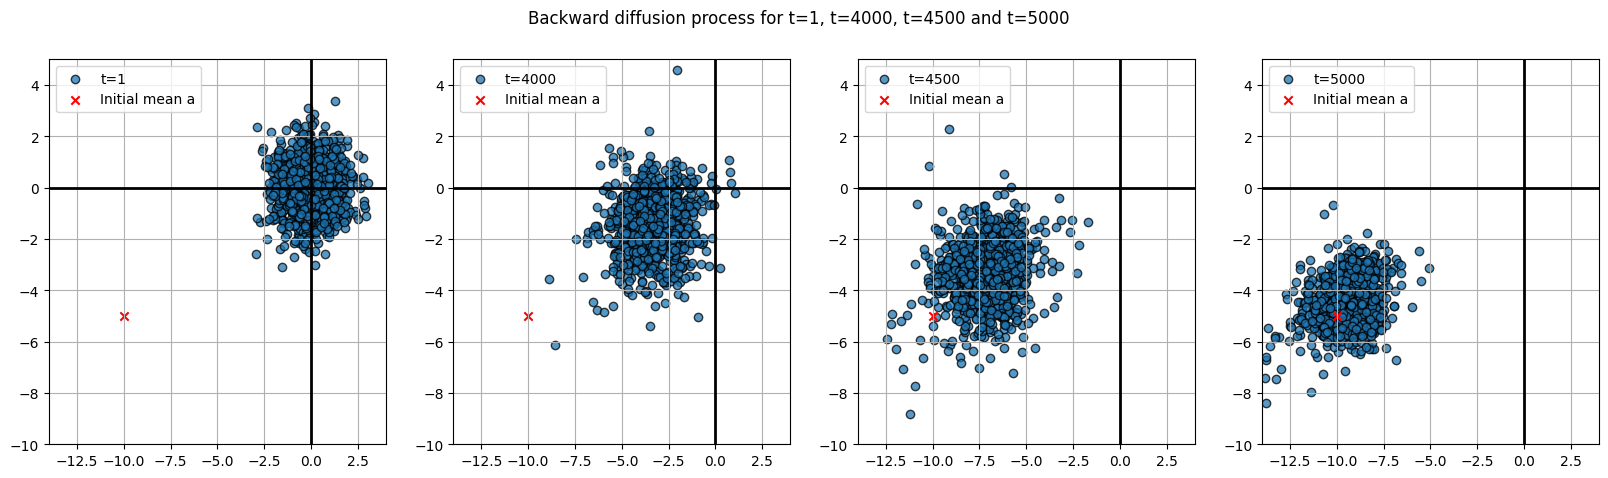

In [13]:
eval_data = torch.randn(1024,2)

trainer.diffuser.model.eval()
with torch.no_grad():
    output, all_outputs = trainer.diffuser.denoise(torch.Tensor(eval_data).to(device), n_steps-1)

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
fig.suptitle("Backward diffusion process for t=1, t=4000, t=4500 and t=5000")
data_tensor = torch.Tensor(np.array(datapoints))
steps = [1, 4000, 4500, 5000]
for step, ax in zip(steps, axs):
    ax.scatter(all_outputs[step-1][:, 0], all_outputs[step-1][:, 1], label='t='+str(step), edgecolor="k", alpha=0.75)
    ax.set_xlim(-14, 4)
    ax.set_ylim(-10,5)
    ax.axhline(0, color='black', linewidth=2)
    ax.axvline(0, color='black', linewidth=2)
    ax.scatter(-10, -5, color='red', marker='x', label='Initial mean a')
    ax.legend()
    ax.grid(True)

### Numerical experiments on high dimensional distributions ### 

We now attempt to verify qualitatively the result of Theorem 3.1 for high-dimensional distributions. 

We consider three image datasets. We train a DDPM on each of those three datasets. By Theorem 3.1, each DDPM encoder performs optimal transport from each dataset distributions to $\mathcal{N}(0,I_2)$. In our context, We consider images distributions on the pixel space $\mathbb{R}^{256\times 256 \times 3}$. Also, we are employing optimal transport in the L2 sense. For images, this implies a similarity in the pixel space, i.e., highlevel texture similarity.

We perform the following experiment: we sample a noise from $\mathcal{N}_{\mathbb{R}^{256\times 256 \times 3}}(0,I_2)$ and use the trained DDPM encoders (one on each datasets) to compute an image. We then compare if these images, from different distributions, share texture and a high level semantic structure. 

We use the LSUN (Large-scale Scene UNderstanding Challenge) from *[Yu et al.](https://arxiv.org/abs/1506.03365v3)* dataset. We consider the categories "cat", "church" and "bedroom" as the three distributions. For the DDPM, we use 256-resolution pretrained model checkpoints from Google, available on *[HuggingFace Diffusers](https://huggingface.co/docs/diffusers/index)*. (See the model cards for *[cat](https://huggingface.co/google/ddpm-ema-cat-256)*, *[church](https://huggingface.co/google/ddpm-ema-church-256)* and *[bedroom](https://huggingface.co/google/ddpm-ema-bedroom-256)*). 

First, lets load the models: 

In [11]:
import torch
from diffusers import UNet2DModel, DDIMScheduler

device = "cuda" if torch.cuda.is_available() else "cpu"

cat_scheduler = DDIMScheduler.from_pretrained("google/ddpm-ema-cat-256")
cat_model = UNet2DModel.from_pretrained("google/ddpm-ema-cat-256").to(device)
cat_scheduler.set_timesteps(100)

bed_scheduler = DDIMScheduler.from_pretrained("google/ddpm-ema-bedroom-256")
bed_model = UNet2DModel.from_pretrained("google/ddpm-ema-bedroom-256").to(device)
bed_scheduler.set_timesteps(100)

church_scheduler = DDIMScheduler.from_pretrained("google/ddpm-ema-church-256")
church_model = UNet2DModel.from_pretrained("google/ddpm-ema-church-256").to(device)
church_scheduler.set_timesteps(100)

sample_size = cat_model.config.sample_size

/opt/mamba/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


We define a function to generate new images from a sample noise. 

In [56]:
def generate_image_compute_costs(input_noise, scheduler, model):
    # generation 
    input = input_noise
    for t in scheduler.timesteps:
        with torch.no_grad():
            noisy_residual = model(input, t).sample
        previous_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
        input = previous_noisy_sample
    image = (input / 2 + 0.5).clamp(0, 1).squeeze()

    # costs
    noise = jnp.array(input_noise.flatten().unsqueeze(0).cpu().numpy())
    image_jax = jnp.array(image.flatten().unsqueeze(0).cpu().numpy())
    geom = pointcloud.PointCloud(noise, image_jax)
    ot_prob = linear_problem.LinearProblem(geom)
    solver = sinkhorn.Sinkhorn()
    ot = solver(ot_prob)
    cost_ot = ot.reg_ot_cost
    cost_ddpm = np.diag(geom.cost_matrix).sum() / input_noise.shape[0]
    eps_rel = (cost_ddpm - cost_ot) / cost_ot

    image = (image.permute(1, 2, 0) * 255).round().to(torch.uint8).cpu().numpy()
    return image, eps_rel

By sampling a random noise from $\mathcal{N}_{\mathbb{R}^{256\times 256 \times 3}}(0,I_2)$, we can generate images from each of the three DDPM encoders and compare the high-level features. 

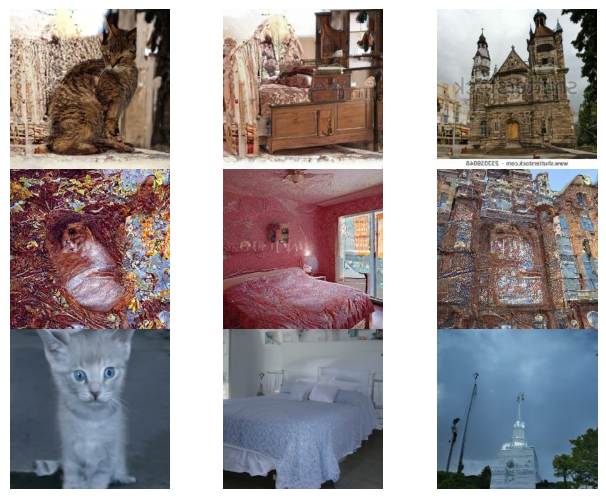

In [57]:
all_eps_rel = list()

f, axarr = plt.subplots(3,3)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
for i in range(3):
    noise = torch.randn((1, 3, sample_size, sample_size), device=device)
    cat_image, cat_eps_rel = generate_image_compute_costs(noise, cat_scheduler, cat_model)
    bed_image, bed_eps_rel = generate_image_compute_costs(noise, bed_scheduler, bed_model)
    church_image, church_eps_rel = generate_image_compute_costs(noise, church_scheduler, church_model) 
    all_eps_rel += [cat_eps_rel, bed_eps_rel, church_eps_rel]
    axarr[i][0].imshow(cat_image)
    axarr[i][1].imshow(bed_image)
    axarr[i][2].imshow(church_image)
    axarr[i][0].axis('off')
    axarr[i][1].axis('off')
    axarr[i][2].axis('off')

We observe that samples from different columns indeed share high-level features such as texture and composition. 

Here we can compute again the relative error between the Monge optimal transport map and the DDPM encoder map, defined by $$ \epsilon_{rel} = \frac{C(DDPM) - C(OT)}{C(OT)} $$ in the case of the flatten image and noise from $\mathbb{R}^{256\times 256 \times 3}$

In [69]:
max_eps_rel = jnp.max(jnp.stack(all_eps_rel))
print("max eps_rel = ", max_eps_rel)

max eps_rel =  0.0


Up to numerical precision, the two costs are exactly the same. 